<a href="https://colab.research.google.com/github/SpaceTimeNarratives/demo/blob/main/spatial_narrative_demo0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spatial Narratives - Demo**
---



## Setting up...

In [12]:
!git clone https://github.com/SpaceTimeNarratives/demo.git

Cloning into 'demo'...
remote: Enumerating objects: 293, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 293 (delta 125), reused 189 (delta 57), pack-reused 0
Receiving objects: 100% (293/293), 29.10 MiB | 27.65 MiB/s, done.
Resolving deltas: 100% (125/125), done.


In [13]:
cd demo

/content/demo


In [ ]:
!pip uninstall -y spacy

In [5]:
!pip -q install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.6/917.6 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 KB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.1/671.1 KB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 KB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.3.1 which is incompatible.


In [ ]:
pip install lemminflect

In [18]:
%run functions.py

## Importing `spaCy`
We need to import the `spaCy` NLP pipeline and load the small version of the English model `en_core_web_sm` for tokenization, tagging, parsing and named entity recognition.

In [19]:
import spacy
from lxml import etree
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# for plotting the map
from geopy.geocoders import Nominatim
import folium

# Get coordinates for locations using GeoPy
geolocator = Nominatim(user_agent="my-application")

Load the Spacy model

In [20]:
nlp = spacy.load("en_core_web_sm")

## Extracting and Analysing Placenames

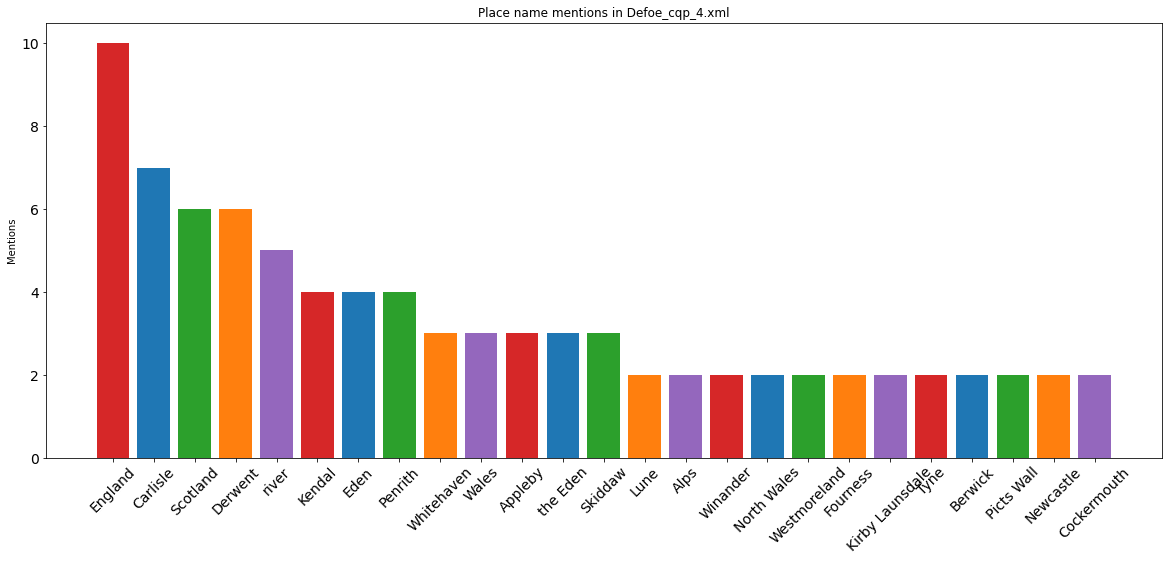

In [21]:
#@title ### Select file {run: "auto"}


#@markdown You can select a file from `gold_standard` folder.
Filename = "Defoe_cqp_4.xml" #@param ["Anon_cqp_66.xml", "Brown_cqp_10.xml", "Clarke_cqp_63.xml", "Cockin_cqp_19.xml", "Coleridge_cqp_33.xml", "Defoe_cqp_4.xml", "Garnett_cqp_62.xml", "Gray_cqp_13.xml", "Keats_cqp_44.xml", "Lt.Hammond._cqp_2.xml", "Otley__cqp_49.xml", "Pennant_cqp_12.xml", "Pennant_cqp_15.xml", "Phillips_cqp_38.xml", "Rix_cqp_78.xml", "Ruskin_cqp_55.xml", "Rutland_cqp_42.xml", "Shaw_cqp_24.xml", "Smith_cqp_5.xml", "Smith_cqp_6.xml", "Smith_cqp_7.xml", "Sullivan_cqp_20.xml", "Wakefield_cqp_37.xml", "Wesley_cqp_9.xml", "West_cqp_17.xml", "Wordsworth_cqp_47.xml", "Wordsworth_cqp_58.xml", "Young_cqp_11.xml"]

# spacy_processed = nlp(re.sub('<[^<]+>', "", open(f'gold_standard/{Filename}').read()))
spacy_processed = nlp(str(etree.tostring(etree.parse(f'gold_standard/{Filename}'
                  ), encoding='utf8', method='text')))
ld_place_names = [name.strip() for name in open('LD_placenames.txt').readlines()]
spacy_entities = extract_entities(spacy_processed.text, ld_place_names)

names, counts = zip(*Counter(plname for _,(plname,_) in spacy_entities.items()).most_common(25))

plt.figure(figsize=(20,8))

bar_labels = ['red', 'blue', 'green', 'orange', 'purple']*5
bar_colors = [f'tab:{col}' for col in bar_labels]
plt.bar(names, counts, label=bar_labels, color=bar_colors)
plt.ylabel('Mentions')
plt.title(f'Place name mentions in {Filename}')
plt.xticks(names, names, rotation=45)
plt.tick_params(axis='both', labelsize=14)
plt.show()

### Visualizing the place names in text

In [ ]:
visualize(spacy_processed.text, spacy_entities)

### Plot the place names on the map

In [23]:
coordinates = []
for location in names:
    location_data = geolocator.geocode(location)
    if location_data is not None:
        coordinates.append((location_data.latitude, location_data.longitude))

# Create map using Folium and add markers for locations
m = folium.Map(location=[coordinates[0][0], coordinates[0][1]], zoom_start=7)
for coord in coordinates:
    folium.Marker(location=[coord[0], coord[1]]).add_to(m)

# Display map
m

In [28]:
# import geopy
# import folium
from IPython.core.display import HTML
# Define the bounding box
bbox = [(54.0, -4.60), (55.0, -2.50)]

# Define the list of place names
places =  ['Keswick', 'Penrith', 'Eamont', 'Ulleswater', 'Cardiff', 'Glasgow']

# Create a map centered on the bounding box
map = folium.Map(location=[(bbox[0][0]+bbox[1][0])/2, (bbox[0][1]+bbox[1][1])/2], zoom_start=8, tiles='Stamen Toner')

# Create two feature groups to store the markers for the places within and outside the bounding box
inside_bbox = folium.FeatureGroup(name='Inside Bounding Box')
outside_bbox = folium.FeatureGroup(name='Outside Bounding Box')

# Loop through each place name and get its coordinates
for place in places:
    location = geopy.geocoders.Nominatim(user_agent="my-application").geocode(place)
    lat, lon = location.latitude, location.longitude
    
    # Check if the coordinates are within the bounding box
    if bbox[0][1] <= lon <= bbox[1][1] and bbox[0][0] <= lat <= bbox[1][0]:
        # Add a marker to the inside_bbox feature group
        folium.Marker(location=[lat, lon], tooltip=place, icon=folium.Icon(color='green', icon='info-sign'), popup=place).add_to(inside_bbox)
    else:
        # Add a marker to the outside_bbox feature group
        folium.Marker(location=[lat, lon], tooltip=place, icon=folium.Icon(color='red', icon='info-sign'), popup=place).add_to(outside_bbox)

# Add the feature groups to the map
inside_bbox.add_to(map)
outside_bbox.add_to(map)

# Add a layer control to toggle between the feature groups
folium.LayerControl().add_to(map)

# Display the map
# HTML("<style>.container { max-width: 100% !important; }</style>")
map

Lake Ulleswater not found!


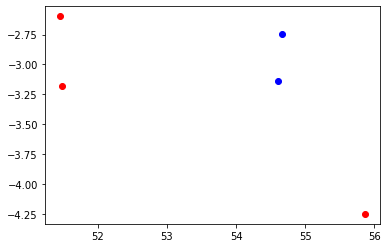

In [8]:
import geopy
import matplotlib.pyplot as plt

# Define the bounding box
bbox = (-4.60, 54.0, -2.50, 55.0)

# Define the list of place names
places = ['Penrith', 'Keswick', 'Lake Ulleswater', 'Bristol', 'Cardiff', 'Glasgow']

# Initialize two lists to store the coordinates of the places within and outside the bounding box
inside_bbox = []
outside_bbox = []

# Loop through each place name and get its coordinates
for place in places:
  try:
    location = geopy.geocoders.Nominatim(user_agent="my-application").geocode(place)
    lat, lon = location.latitude, location.longitude

    # Check if the coordinates are within the bounding box
    if bbox[0] <= lon <= bbox[2] and bbox[1] <= lat <= bbox[3]:
        inside_bbox.append((lat, lon))
    else:
        outside_bbox.append((lat, lon))
  except:
    print(f"{place} not found!")

# Plot the points using different colors
plt.scatter(*zip(*inside_bbox), color='blue')
plt.scatter(*zip(*outside_bbox), color='red')
plt.show()

Lake Ulleswater not found!


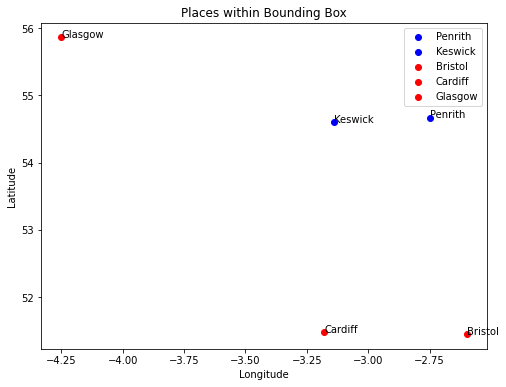

In [10]:
import geopy
import matplotlib.pyplot as plt

# Define the list of place names
places = ['Penrith', 'Keswick', 'Lake Ulleswater', 'Bristol', 'Cardiff', 'Glasgow']

# Initialize two lists to store the coordinates of the places within and outside the bounding box
inside_bbox = []
outside_bbox = []

# Loop through each place name and get its coordinates
for place in places:
    try:
        location = geopy.geocoders.Nominatim(user_agent="my-application").geocode(place)
        lat, lon = location.latitude, location.longitude

        # Check if the coordinates are within the bounding box
        if -4.60 <= lon <= -2.50 and 54.0 <= lat <= 55.0:
            inside_bbox.append((place, lat, lon))
        else:
            outside_bbox.append((place, lat, lon))
    except:
        print(f"{place} not found!")

# Plot the points using different colors
fig, ax = plt.subplots(figsize=(8, 6))
# ax.set_xlim(-4.60, -2.50)
# ax.set_ylim(54.0, 55.0)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Places within Bounding Box')

for place, lat, lon in inside_bbox:
    ax.scatter(lon, lat, color='blue', label=place)
    ax.annotate(place, (lon, lat))

for place, lat, lon in outside_bbox:
    ax.scatter(lon, lat, color='red', label=place)
    ax.annotate(place, (lon, lat))

ax.legend()
plt.show()